In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/Details.csv', encoding='latin1')
df

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-25681,1096,658,7,Electronics,Electronic Games,COD
1,B-26055,5729,64,14,Furniture,Chairs,EMI
2,B-25955,2927,146,8,Furniture,Bookcases,EMI
3,B-26093,2847,712,8,Electronics,Printers,Credit Card
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card
...,...,...,...,...,...,...,...
1495,B-25700,7,-3,2,Clothing,Hankerchief,COD
1496,B-25757,3151,-35,7,Clothing,Trousers,EMI
1497,B-25973,4141,1698,13,Electronics,Printers,COD
1498,B-25698,7,-2,1,Clothing,Hankerchief,COD


In [ ]:
df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-25681,1096,658,7,Electronics,Electronic Games,COD
1,B-26055,5729,64,14,Furniture,Chairs,EMI
2,B-25955,2927,146,8,Furniture,Bookcases,EMI
3,B-26093,2847,712,8,Electronics,Printers,Credit Card
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card


In [ ]:
df.tail()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
1495,B-25700,7,-3,2,Clothing,Hankerchief,COD
1496,B-25757,3151,-35,7,Clothing,Trousers,EMI
1497,B-25973,4141,1698,13,Electronics,Printers,COD
1498,B-25698,7,-2,1,Clothing,Hankerchief,COD
1499,B-25993,4363,305,5,Furniture,Tables,EMI


In [ ]:
# Check basic info
print(df.info())
df.head()
# Calculate new columns
df['Profit Margin (%)'] = (df['Profit'] / df['Amount'])*100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1500 non-null   object
 1   Amount        1500 non-null   int64 
 2   Profit        1500 non-null   int64 
 3   Quantity      1500 non-null   int64 
 4   Category      1500 non-null   object
 5   Sub-Category  1500 non-null   object
 6   PaymentMode   1500 non-null   object
dtypes: int64(3), object(4)
memory usage: 82.2+ KB
None


In [ ]:
# Check for missing values
df.isnull().sum()

,0
Order ID,0
Amount,0
Profit,0
Quantity,0
Category,0
Sub-Category,0
PaymentMode,0
Profit Margin (%),0


/tmp/ipython-input-27-2169784904.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




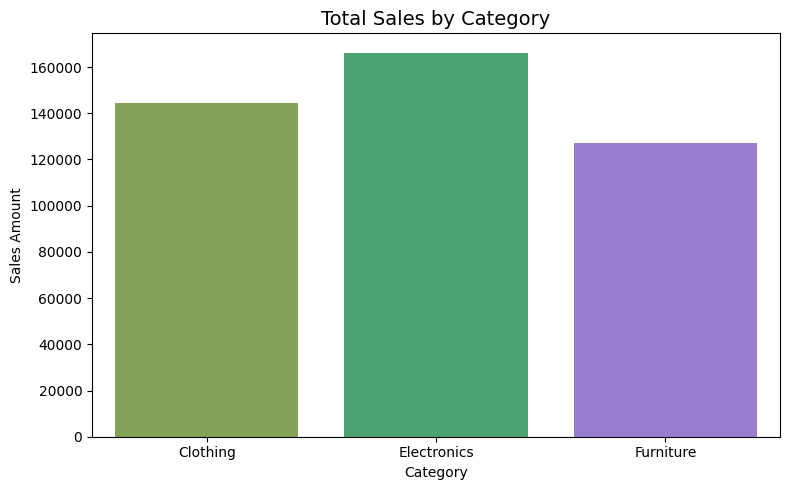

In [ ]:
cat_sales = df.groupby('Category')['Amount'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=cat_sales, x='Category', y='Amount', palette=['#88B04B', '#3CB371', '#9370DB'])
plt.title("Total Sales by Category", fontsize=14)
plt.ylabel("Sales Amount")
plt.xlabel("Category")
plt.tight_layout()
plt.show()

/tmp/ipython-input-28-1725507477.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




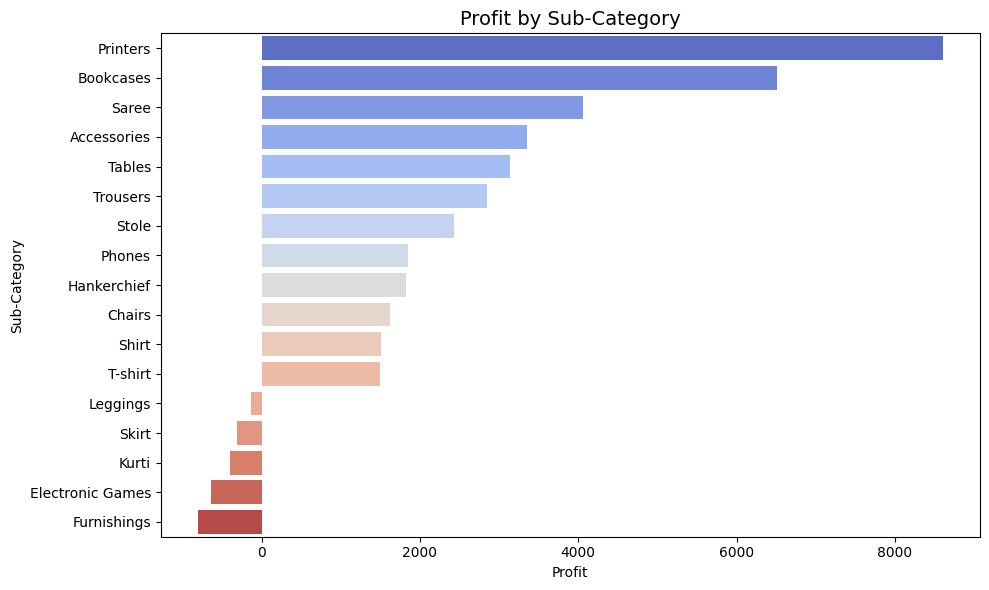

In [ ]:
subcat_profit = df.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=subcat_profit, x='Profit', y='Sub-Category', palette='coolwarm')
plt.title("Profit by Sub-Category", fontsize=14)
plt.xlabel("Profit")
plt.ylabel("Sub-Category")
plt.tight_layout()
plt.show()

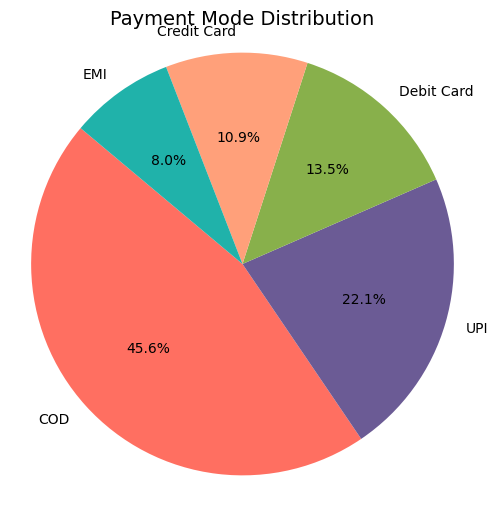

In [ ]:
payment_counts = df['PaymentMode'].value_counts()

plt.figure(figsize=(6,6))

# 🎨 New color palette (custom hex colors)
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#FFA07A', '#20B2AA']

plt.pie(payment_counts,
        labels=payment_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors)

plt.title("Payment Mode Distribution", fontsize=14)
plt.axis('equal')
plt.show()


In [ ]:
fig = px.scatter(
    df, x='Amount', y='Profit', size='Quantity', color='Category',
    hover_data=['Sub-Category', 'PaymentMode'],
    title="Profit vs Sales (Bubble Size = Quantity)",
    color_discrete_sequence=px.colors.qualitative.Set1
)
fig.show()

In [ ]:
fig = px.sunburst(
    df,
    path=['Category', 'Sub-Category', 'PaymentMode'],
    values='Amount',
    color='Profit',
    color_continuous_scale='RdYlGn',
    title="Sales Breakdown: Category → Sub-Category → Payment Mode"
)
fig.show()

In [ ]:
# 5. Feature Engineering: Add Profit Margin
df['Profit Margin (%)'] = (df['Profit'] / df['Amount']) * 100

# 6. KPIs Summary
total_sales = df['Amount'].sum()
total_profit = df['Profit'].sum()
avg_margin = df['Profit Margin (%)'].mean()
total_orders = df['Order ID'].nunique()
total_quantity = df['Quantity'].sum()

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Avg. Profit Margin: {avg_margin:.2f}%")
print(f"Total Unique Orders: {total_orders}")
print(f"Total Units Sold: {total_quantity}")

Total Sales: $437,771.00
Total Profit: $36,963.00
Avg. Profit Margin: 1.92%
Total Unique Orders: 500
Total Units Sold: 5615
